### Тестовое задание Иванова Артёма Владиславовича, email: av.ivanov567@gmail.com, тел.: 89855006956.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Запишем уравнение <br>
$\begin{equation}
\frac{d^5y}{dx^5} + 15 \frac{d^4y}{dx^4} + 90 \frac{d^3y}{dx^3} + 270 \frac{d^2y}{dx^2} + 405\frac{dy}{dx} + 243y = 0
\end{equation}$<br>
в виде системы уравнений<br>
$\begin{equation}
    \begin{cases}
      \frac{dy_5}{dx} = -(15y_5 + 90y_4 + 270y_3 + 405y_2 + 243y_1)\\
      \frac{dy_4}{dx} = y_5\\
      \frac{dy_3}{dx} = y_4\\
      \frac{dy_2}{dx} = y_3\\
      \frac{dy_1}{dx} = y_2,\\
    \end{cases}
\end{equation}$<br>
которую мы и будем решать:**

In [2]:
def solver(coefficients: np.array, initial_conditions: np.array, err: float, a: int = 0, b: int = 5):
    """
    Реализация решения системы (2) явной схемой.

    :param coefficients: коэффициенты уравнения (1)
    :param initial_conditions: начальные условия
    :param err: 1/шаг
    :param a, b: граничные узлы сетки
    :return: разностная аппроксимация y_1
    """
    steps = int((b-a)*err)
    step = 1/err
    m = len(initial_conditions)

    prev_state = initial_conditions
    new_state = np.zeros(m)
    result = [initial_conditions[0]]

    for i in range(steps-1):
        for k in range(m):
            if k != m-1:
                new_state[k] = prev_state[k] + step * prev_state[k+1]
            else:
                new_state[k] = prev_state[k] - step * np.dot(coefficients[:-1], prev_state)
        prev_state = new_state
        result.append(new_state[0])

    return np.array(result)

**Для проверки результата, воспользуемся точным решением задачи Коши из задания. Характеристическое уравнение уравнения (1): <br>
$(\lambda - 3)^5 = 0$. <br>
Тогда общее решение уравнения (1):<br>
$y_o = (C_1 + C_2x + C_3x^2 + C_4x^3 + C_5x^4)e^{-3x}$.<br>
Решение задачи Коши:<br>
$y = (3x + \frac{9}{2}x^2 - \frac{4}{3}x^3 - \frac{43}{4}x^4)e^{-3x}$.<br>
График решения:**

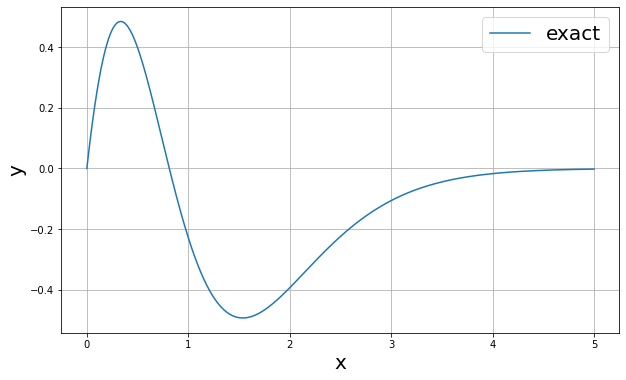

In [3]:
plt.figure(figsize=(10,6))
exact_solution = lambda z: (3*z + 9/2 *z**2 - 4/3 *z**3 - 43/4 * z**4)*np.exp(-3*z)
x = np.arange(0, 5, 0.001)
y = exact_solution(x)

plt.plot(x, y, label="exact")
plt.grid(True)
plt.xlabel("x", fontsize=20)
plt.ylabel("y", fontsize=20)
plt.legend(prop={'size': 20})

**Проверка численного решения:**

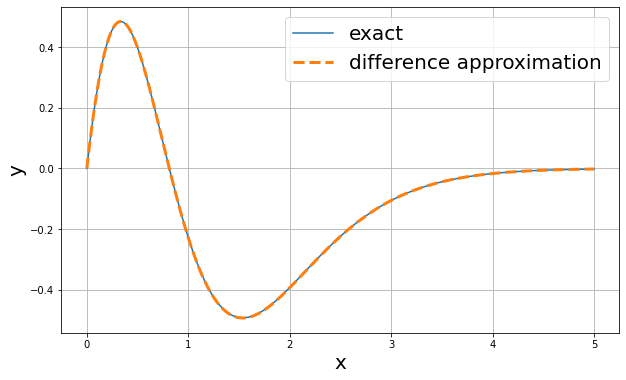

In [4]:
plt.figure(figsize=(10,6))
c = np.array([243, 405, 270, 90, 15, 1])
initial = np.array([0, 3, -9, -8, 0])
inv_step = 1e4

x = np.arange(0, 5, 1/inv_step)
approximation = solver(coefficients=c, initial_conditions=initial, err=inv_step)
y = exact_solution(x)

plt.plot(x, y, label="exact")
plt.plot(x, approximation, '--', linewidth=3.0, label="difference approximation")
plt.grid(True)
plt.xlabel("x", fontsize=20)
plt.ylabel("y", fontsize=20)
plt.legend(prop={'size': 20})